<a href="https://colab.research.google.com/github/aakashk243/Machine_Learning_Lab/blob/main/Decision%20Tree/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [ ]:
col_names = ['pregnant', 'glucose' , 'bp' , 'skin' , 'insulin',
'bmi', 'pedigree' , 'age', 'label' ]
data = pd.read_csv('/content/drive/MyDrive/ML_labActivity/diabetes.csv', header= None,
names=col_names, skiprows=1)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi',
'age' , 'glucose' , 'bp' , 'pedigree' ]
x=data[feature_cols]
y=data.label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape,
y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [ ]:
model= DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('y_pred: ', y_pred)

y_pred:  [1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 1]


In [ ]:

conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)

print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[77 23]
 [19 35]]
Accuracy Score :  0.7272727272727273
Accuracy in Percentage :  72 %


<Axes: xlabel='Predicted', ylabel='Actual'>

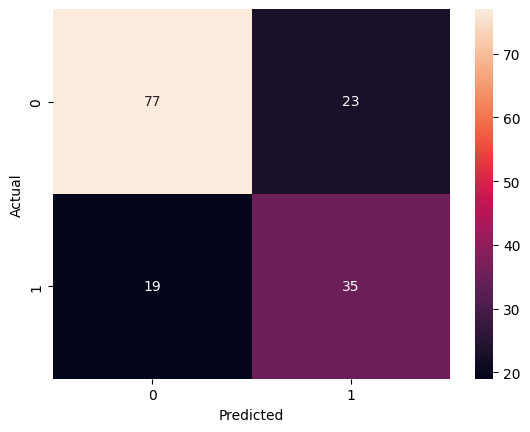

In [ ]:

conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual' ],
colnames=['Predicted' ])
sn.heatmap(conf_mat, annot=True)

1. In a classification tree, the data set splits according to its variables. In this scenario, you have two variables, age
and income, determining whether someone buys a house. If training data tells us that 70 percent of people over
age 30 bought a house, then the data gets split there, with age becoming the first node in the tree. This split makes
the data 80 percent "pure." The second node then addresses income from there.


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML_labActivity/sample_house_dataset.csv")

# Check for missing values
print(df.isnull().sum())

# Drop rows with NaN (if any)
df = df.dropna()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le_income = LabelEncoder()
le_buy = LabelEncoder()

df["income"] = le_income.fit_transform(df["income"])
df["buy_house"] = le_buy.fit_transform(df["buy_house"])

# Features and target
X = df[["age", "income"]]
y = df["buy_house"]

# Train model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X, y)


age          0
income       0
buy_house    0
dtype: int64


DecisionTreeClassifier(max_depth=3, random_state=42)

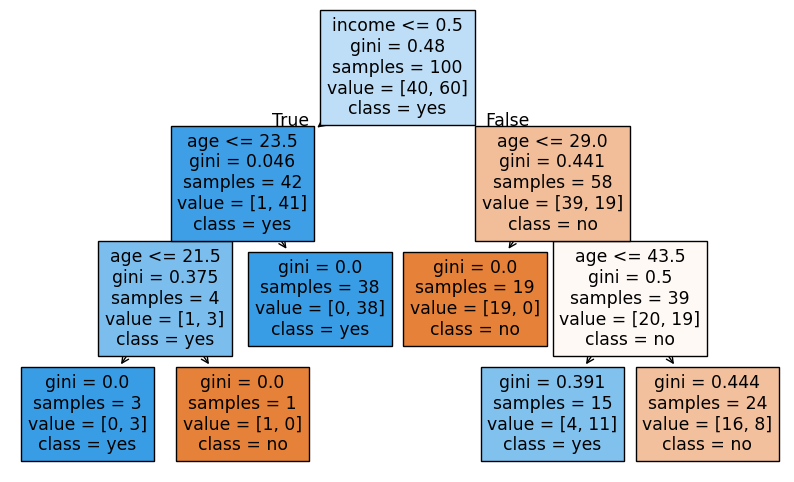

In [ ]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=["age", "income"], class_names=["no", "yes"], filled=True)
plt.show()

In [ ]:

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred) * 100
print(f"\nAccuracy of Decision Tree: {accuracy:.2f}%")


Accuracy of Decision Tree: 88.00%


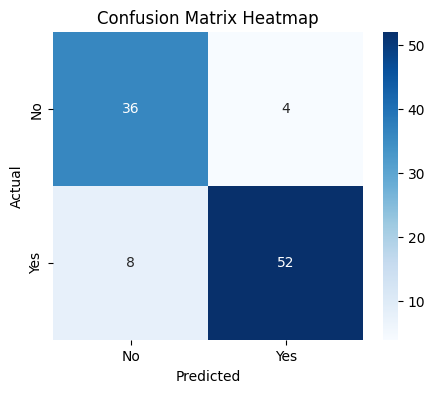

In [ ]:

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


2. What you do after work in your free time can depend on the weather. If it is sunny, you might choose to picnic
with a friend, grab a drink with a colleague, or run errands. If it is raining, you might stay home and watch a movie
instead. In this scenario, you have a clear outcome. In this case, that is classified as whether to "go out" or "stay in.".

In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/ML_labActivity/free_time_activity_dataset.csv")
df.head()

,weather,activity,outcome
0,sunny,errands,go out
1,sunny,drink,go out
2,sunny,drink,go out
3,sunny,errands,go out
4,rainy,cook,stay in


In [ ]:
df_encoded = df.copy()
df_encoded["weather"] = df_encoded["weather"].map({"sunny":0, "rainy":1})
df_encoded["activity"] = df_encoded["activity"].map({
    "picnic":0, "drink":1, "errands":2, "movie":3, "cool":4
})
df_encoded["outcome"] = df_encoded["outcome"].map({"stay in":0, "go out":1})

In [ ]:
X = df_encoded[["weather", "activity"]]
y = df_encoded["outcome"]

model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

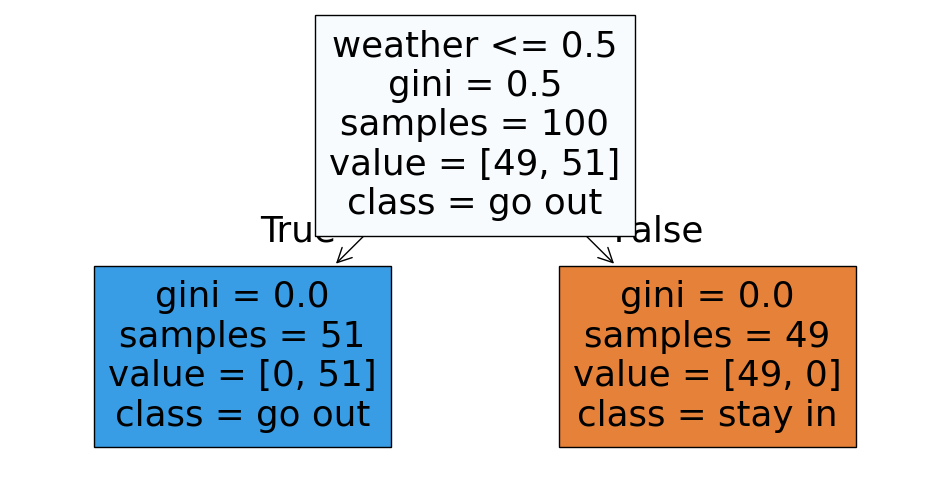

In [ ]:

plt.figure(figsize=(12,6))
plot_tree(model, feature_names=["weather", "activity"], class_names=["stay in", "go out"], filled=True)
plt.show()

In [ ]:

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred) * 100
print(f"\nAccuracy of Decision Tree: {accuracy:.2f}%")


Accuracy of Decision Tree: 100.00%


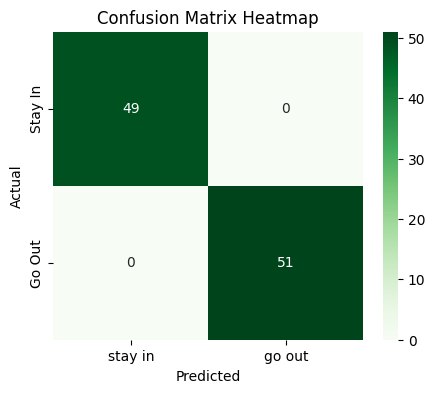

In [ ]:

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["stay in", "go out"], yticklabels=["Stay In", "Go Out"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()